In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
trips = []
for i in range(1, 25):
    trips.append(pd.read_pickle(f'data/trips_combined_boston/{i}.pkl'))
combined_trips = pd.concat(trips)
combined_trips

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,413,2015-01-01 16:19:32,2015-01-01 16:26:26,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,481.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,575,2015-01-02 08:06:49,2015-01-02 08:16:25,90.0,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1295.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,886,2015-01-02 11:38:38,2015-01-02 11:53:24,95.0,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,652.0,casual,1992,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1027,2015-01-02 13:33:05,2015-01-02 13:50:12,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1094.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,383,2015-01-05 10:15:46,2015-01-05 10:22:09,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,761.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616979,312,2024-01-12 15:38:53,2024-01-12 15:44:05,NaN,Charlestown Navy Yard,42.374125,-71.054812,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,BA5F71F2B4F60857,classic_bike,D32039,D32038,member
11616980,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
11616981,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
11616982,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member


In [89]:
STATION_NAME = 'Mass Ave T Station'

In [90]:
station = combined_trips.loc[(combined_trips['start_station_name'] == STATION_NAME) | (combined_trips['end_station_name'] == STATION_NAME)]
station

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
2547596,2969291,2019-06-14 09:15:17.259,2019-07-18 18:03:28.401,121.0,W Broadway at Dorchester St,42.335959,-71.046229,404,Mass Ave T Station,42.341356,...,1178.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2626558,8632679,2019-06-26 19:10:57.143,2019-10-04 17:08:56.929,339.0,Archdale Rd at Washington St,42.292666,-71.121195,404,Mass Ave T Station,42.341356,...,3648.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2643465,1507435,2019-06-29 00:56:15.332,2019-07-16 11:40:11.205,40.0,Lewis Wharf at Atlantic Ave,42.363871,-71.050877,404,Mass Ave T Station,42.341356,...,2990.0,casual,1994,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2750734,954,2019-07-15 16:06:35.646,2019-07-15 16:22:30.112,282.0,Stony Brook T Stop,42.316966,-71.104374,404,Mass Ave T Station,42.341356,...,2232.0,member,1992,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2750926,775,2019-07-15 16:22:30.753,2019-07-15 16:35:26.204,67.0,MIT at Mass Ave / Amherst St,42.358100,-71.093198,404,Mass Ave T Station,42.341356,...,1101.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11608925,375,2024-01-04 14:46:44.000,2024-01-04 14:52:59.000,NaN,Mass Ave T Station,42.341356,-71.083370,NaN,Albany St at E. Brookline St,42.336648,...,NaN,NaN,NaN,NaN,NaN,DC543E4A45D56C17,classic_bike,C32063,C32061,member
11608979,629,2024-01-09 14:45:54.000,2024-01-09 14:56:23.000,NaN,Mass Ave T Station,42.341356,-71.083370,NaN,One Brigham Circle,42.333923,...,NaN,NaN,NaN,NaN,NaN,6DED15E8DE6473D2,classic_bike,C32063,B32036,member
11609202,376,2024-01-22 08:01:22.000,2024-01-22 08:07:38.000,NaN,Mass Ave T Station,42.341356,-71.083370,NaN,Albany St at E. Brookline St,42.336648,...,NaN,NaN,NaN,NaN,NaN,ACDEAFA402C40B36,classic_bike,C32063,C32061,member
11609297,851,2024-01-25 09:26:43.000,2024-01-25 09:40:54.000,NaN,Mass Ave T Station,42.341356,-71.083370,NaN,One Brigham Circle,42.333923,...,NaN,NaN,NaN,NaN,NaN,23A0E2BFBA355F67,classic_bike,C32063,B32036,member


In [91]:
started = station.loc[station['start_station_name'] == STATION_NAME]
ended = station.loc[station['end_station_name'] == STATION_NAME]

In [92]:
HOURS = [datetime.time(i) for i in range(24)]
HOURS_FORMATTED = [datetime.time(i).strftime('%-I %p') for i in range(24)]

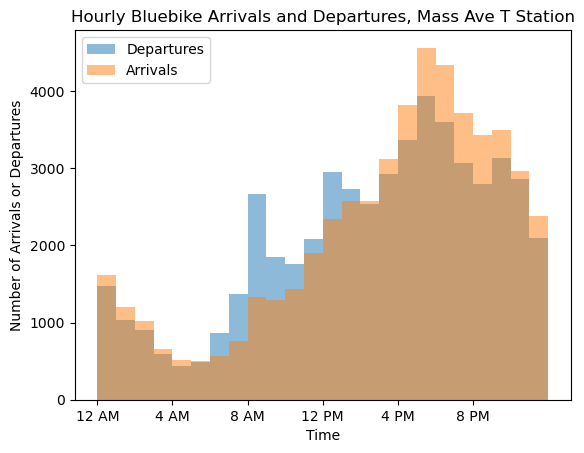

In [93]:
b1 = plt.hist(started['started_at'].dt.time, alpha=0.5, bins=24, label='Departures')
b2 = plt.hist(ended['ended_at'].dt.time, alpha=0.5, bins=24, label='Arrivals')
plt.xticks(HOURS[::4], HOURS_FORMATTED[::4])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Arrivals or Departures')
plt.title(f'Hourly Bluebike Arrivals and Departures, {STATION_NAME}')
plt.show()

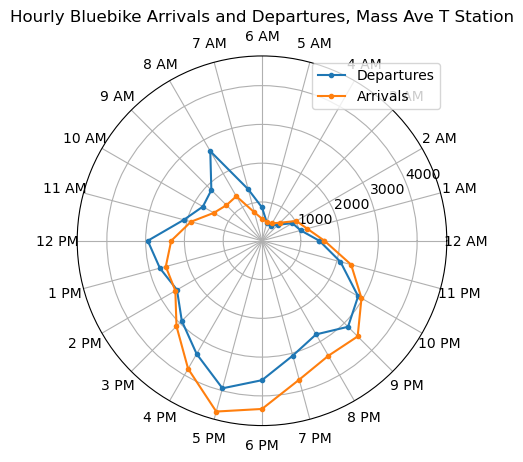

In [94]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.linspace(0, 2*np.pi, 25), list(b1[0]) + [b1[0][0]], marker='.', label='Departures')
ax.plot(np.linspace(0, 2*np.pi, 25), list(b2[0]) + [b2[0][0]], marker='.', label='Arrivals')
ax.set_xticks(np.linspace(0, 23/12*np.pi, 24), HOURS_FORMATTED)
plt.legend()
plt.title(f'Hourly Bluebike Arrivals and Departures, {STATION_NAME}')
plt.show()